In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'bank-additional-full.csv'
df = pd.read_csv(file, sep = ';')


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.groupby('y').mean()
# Number of success is very low compared to failures. 36548 = 0 and 4640 = 1
# columns have missing values of unknown or nonexistent values.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [5]:
#check for missing values 
print(df.info())
df.isnull().any().any()

#No values are missing. No steps were taken to fill missing values. There are however, 'unknown' 
#categories within variables which may need to be addressed later on. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

False

In [6]:
#job marital unknown

#df_unknown_job = df[df.job == 'unknown']
#print(df['job'].value_counts(dropna=False))
#print(df['marital'].value_counts(dropna=False))
#print(df['education'].value_counts(dropna=False))

#print(df_unknown_job)

df = df.rename(columns = {'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 
                          'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

(41188, 21)

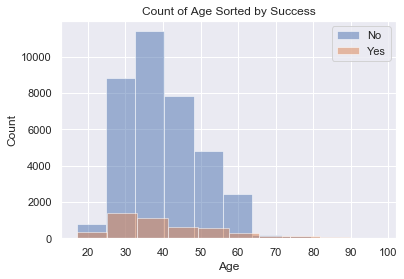

In [7]:
sns.set(style = 'darkgrid')
yes = df[df['y'] == 'yes']
no = df[df['y'] == 'no']
ax = plt.hist(x = 'age', alpha = 0.5, data = no)
ax = plt.hist(x = 'age', alpha = 0.5, data = yes)
ax = plt.title('Count of Age Sorted by Success')
ax = plt.legend(['No', 'Yes'])
ax = plt.xlabel('Age')
ax = plt.ylabel('Count')
plt.savefig('agecount.png')
plt.show()

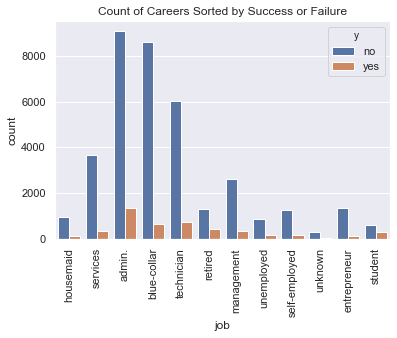

In [8]:
#early data analysis 
ax = sns.countplot(x = 'job', hue = 'y', data = df)
ax.set_title('Count of Careers Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.savefig('careers.png')
plt.show()


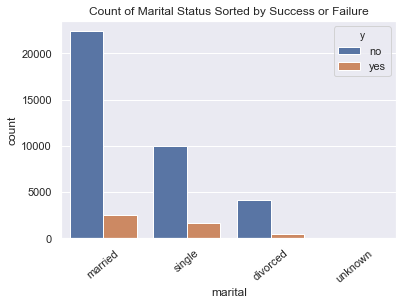

In [9]:
ax = sns.countplot(x = 'marital', hue = 'y', data = df)
ax.set_title('Count of Marital Status Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

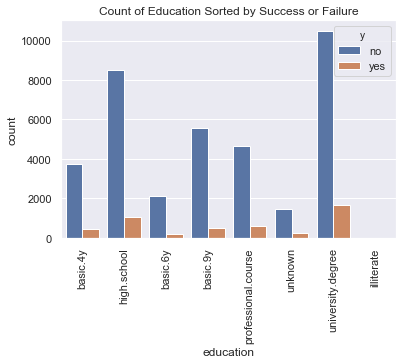

In [10]:
ax = sns.countplot(x = 'education', hue = 'y', data = df)
ax.set_title('Count of Education Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

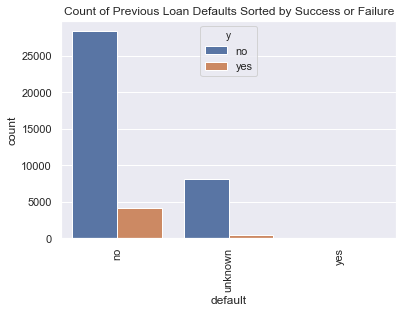

In [11]:
ax = sns.countplot(x = 'default', hue = 'y', data = df)
ax.set_title('Count of Previous Loan Defaults Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

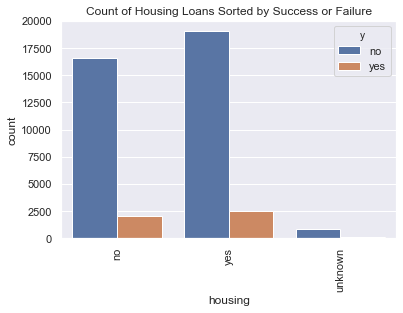

In [12]:
ax = sns.countplot(x = 'housing', hue = 'y', data = df)
ax.set_title('Count of Housing Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

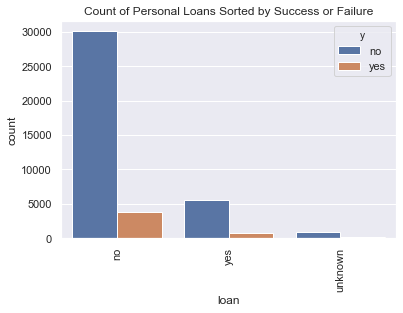

In [13]:
ax = sns.countplot(x = 'loan', hue = 'y', data = df)
ax.set_title('Count of Personal Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

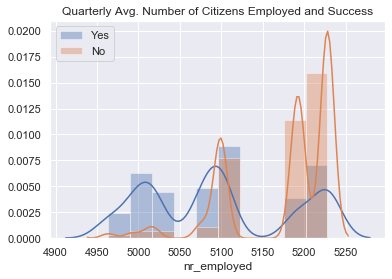

In [14]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(yes.nr_employed, bins = 10, label = 'Yes')
sns.distplot(no.nr_employed, bins = 10, label = 'No')
plt.title('Quarterly Avg. Number of Citizens Employed and Success')
plt.legend()
plt.savefig('nremployed.png')
plt.show()

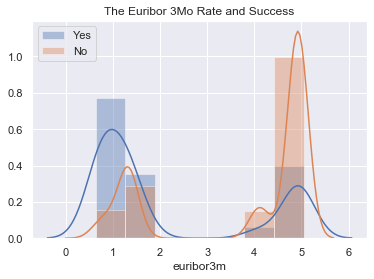

In [15]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(yes.euribor3m, bins = 7, label = 'Yes')
sns.distplot(no.euribor3m, bins = 7, label = 'No')
plt.title('The Euribor 3Mo Rate and Success')
plt.legend()
plt.savefig('euribor3m.png')
plt.show()


In [16]:
#perform correlation test

In [17]:
#apply machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


In [18]:
# Job and Marital status encoding. 
categorical_features = ['job', 'marital']
data1 = df

enc_job = preprocessing.OneHotEncoder()
job_enc = enc_job.fit_transform(df.job.values.reshape(-1,1)).toarray()
job_enc = pd.DataFrame(job_enc, columns = ['job_'+enc_job.categories_[0][int(i)]
                                        for i in range(job_enc.shape[1])])
data1 = pd.concat([df, job_enc], axis=1)

enc_mar = preprocessing.OneHotEncoder()
mar_enc = enc_mar.fit_transform(df.marital.values.reshape(-1,1)).toarray()
mar_enc = pd.DataFrame(mar_enc, columns = ['mar_'+ enc_mar.categories_[0][int(i)]
                                        for i in range(mar_enc.shape[1])])
data1 = pd.concat([data1,mar_enc], axis=1)

#print(data1)

In [19]:
#Encode housing/loan/default variables. Do they have housing loan/personal loan/or previous 
#credit default? no/0 yes/1 unknown/2

#print(df.loan.value_counts())

encoder = preprocessing.OrdinalEncoder(categories=[['unknown', 'yes', 'no']])
data1['housingenc'] = encoder.fit_transform(data1.housing.values.reshape(-1,1))
data1['defaultenc'] = encoder.fit_transform(data1.default.values.reshape(-1,1))
data1['loanenc'] = encoder.fit_transform(data1.loan.values.reshape(-1,1))

#Education Encoding
encoder = preprocessing.OrdinalEncoder(categories=[['unknown','illiterate','basic.4y', 'basic.6y',
                                                    'basic.9y', 'high.school','professional.course',
                                                    'university.degree']])
data1['educationenc'] = encoder.fit_transform(data1.education.values.reshape(-1,1))

#print(df.day_of_week.value_counts())
#Encode Month and day of the week variables
encoder = preprocessing.OrdinalEncoder(categories=[['jan', 'feb','mar','apr','may','jun','jul',
                                                   'aug','sep','oct','nov','dec']])
data1['monthenc'] = encoder.fit_transform(data1.month.values.reshape(-1,1))

encoder = preprocessing.OrdinalEncoder(categories=[['mon','tue','wed','thu','fri']])
data1['dayofweekenc'] = encoder.fit_transform(data1.day_of_week.values.reshape(-1,1))
#print(data1)

In [20]:
#Contact method Encoding cellular/0 or telephone/1

le = preprocessing.LabelEncoder()
contact_method= le.fit_transform(df.contact)
contact_method = pd.DataFrame(contact_method, columns = ['contact_method'])
data1['contact_method'] = contact_method

#previvous marketing campaign outcome, nonexistent/0, failure/1, success/2
encoder = preprocessing.OrdinalEncoder(categories=[['nonexistent', 'failure', 'success']])
data1['previouscamp'] = encoder.fit_transform(df.poutcome.values.reshape(-1,1))

#target variable encoding no/0 yes/1
yes = le.fit_transform(df.y)
data1['yes'] = pd.DataFrame(yes)

print(data1.head())
print(data1.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  mar_unknown  housingenc  defaultenc  loanenc  \
0   may         mon  ...          0.0         2.0         2.0      2.0   
1   may         mon  ...          0.0         2.0         0.0      2.0   
2   may         mon  ...          0.0         1.0         2.0      2.0   
3   may         mon  ...          0.0         2.0         2.0      2.0   
4   may         mon  ...          0.0         2.0         2.0      1.0   

  educationenc  monthenc  dayofweekenc  contact_method  previouscamp  yes  
0          2.0       4

In [21]:
#Remove all uneccesary object variables, split into dependent and independent variables.
data1.info()
data2 = data1.select_dtypes(exclude= 'object')
data2 = data2.drop(['yes','duration'], axis = 1)
target_var = data1['yes']

data2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
age                  41188 non-null int64
job                  41188 non-null object
marital              41188 non-null object
education            41188 non-null object
default              41188 non-null object
housing              41188 non-null object
loan                 41188 non-null object
contact              41188 non-null object
month                41188 non-null object
day_of_week          41188 non-null object
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null object
emp_var_rate         41188 non-null float64
cons_price_idx       41188 non-null float64
cons_conf_idx        41188 non-null float64
euribor3m            41188 non-null float64
nr_employed          41188 non-null float64
y                    41188 non-

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'mar_divorced', 'mar_married', 'mar_single', 'mar_unknown',
       'housingenc', 'defaultenc', 'loanenc', 'educationenc', 'monthenc',
       'dayofweekenc', 'contact_method', 'previouscamp'],
      dtype='object')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data2, target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 5, verbose= 1,
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest has an accuracy of: 0.900


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 42, verbose=1)

parameters = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [3, 5, 10, 20]
}

cv_clf = GridSearchCV(estimator=clf, param_grid= parameters, cv = 5)

results = cv_clf.fit(data2, target_var)
results1 = results.cv_results_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

In [35]:
results1 = pd.DataFrame(results1)
print(results1)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.964503      0.028205         0.068653        0.011939   
1        4.589058      0.079186         0.298339        0.013622   
2        9.180408      0.189681         0.554449        0.008600   
3       13.220619      1.050692         0.784586        0.078179   
4        1.041308      0.019554         0.057512        0.004374   
5        5.115323      0.075985         0.255315        0.007748   
6       10.179173      0.195268         0.509630        0.019316   
7       15.191924      0.199932         0.749590        0.018330   
8        1.603520      0.052355         0.065420        0.005145   
9        7.926729      0.216868         0.308987        0.029408   
10      15.804137      0.428164         0.607787        0.054370   
11      23.661176      0.628003         0.901793        0.080738   
12       2.431120      0.084683         0.084763        0.019927   
13      12.203734      0.467840         0.406505

Random Forest has an accuracy of: 0.899


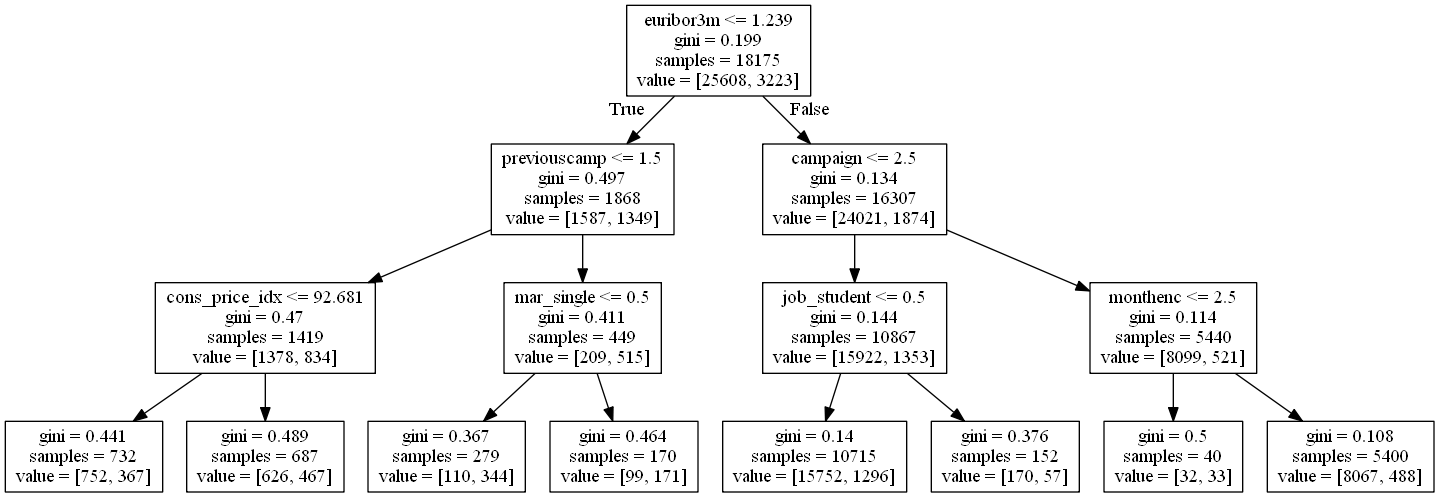

In [41]:
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth = 3, 
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)


from sklearn.tree import export_graphviz

#export as dot file
estimator = clf.estimators_[50]
export_graphviz(estimator, out_file = 'a3100tree.dot',
                feature_names = data2.columns,
                rounded = False)


!dot -Tpng a3100tree.dot -o a3100tree.png

from IPython.display import Image
Image(filename = 'a3100tree.png')

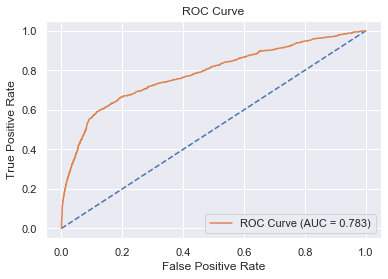

In [42]:
#calculate roc and auc 

#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.savefig('clfROC')
_ = plt.show()



f1: 0.270 ap: 0.441


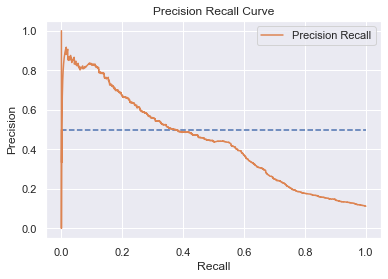

In [43]:
#precision recall curves
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)

#f1 score 
f1 = metrics.f1_score(y_test, y_predicted)
#auc of precision recall
PRauc = metrics.auc(recall, precision)
#average precision score
ap = metrics.average_precision_score(y_test, y_pred_proba)

print('f1: %.3f ap: %.3f' % (f1, ap))

_ = plt.plot([0,1],[0.5,0.5], linestyle = '--')
_ = plt.plot(recall, precision, label = 'Precision Recall' 
             % PRauc)
_ = plt.title('Precision Recall Curve')
_ = plt.xlabel('Recall')
_ = plt.ylabel('Precision')
_ = plt.legend(loc = 'best')
_ = plt.savefig('CLFPrec_Recall')
_ = plt.show()

In [51]:
treesoutput = open('regoutput', 'w')
feature_importance = pd.Series(clf.feature_importances_, 
                               index = data2.columns).sort_values(ascending=False)
print(feature_importance)
print(feature_importance[0:10], file = treesoutput)

euribor3m            0.229407
nr_employed          0.198787
pdays                0.141971
previouscamp         0.132129
emp_var_rate         0.086354
cons_conf_idx        0.071493
cons_price_idx       0.042659
monthenc             0.023152
previous             0.022377
contact_method       0.014926
age                  0.011165
defaultenc           0.007132
job_student          0.006163
job_retired          0.004387
job_blue-collar      0.002100
dayofweekenc         0.001738
educationenc         0.001501
campaign             0.001215
mar_single           0.000450
job_admin.           0.000154
mar_divorced         0.000127
job_unknown          0.000103
job_technician       0.000092
housingenc           0.000088
job_services         0.000068
job_unemployed       0.000057
job_management       0.000052
mar_unknown          0.000043
loanenc              0.000034
mar_married          0.000032
job_entrepreneur     0.000023
job_housemaid        0.000023
job_self-employed    0.000000
dtype: flo

In [55]:
fhout = open('output.png', 'rb')
feature_importance = fhout.read()
fhout.close


FileNotFoundError: [Errno 2] No such file or directory: 'output.png'

In [47]:
#remove features with less than 0.01 importance.

cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar','job_technician',
       'mar_divorced', 'mar_married', 'mar_single',
       'housingenc', 'defaultenc', 'loanenc', 'educationenc', 'monthenc',
       'dayofweekenc', 'contact_method', 'previouscamp']

#rerun analysis
#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data2[cols], target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 5, 
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)

Random Forest has an accuracy of: 0.900


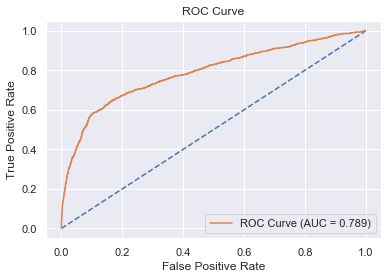

In [48]:
#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.show()

6.015
Random Forest has an accuracy of: 0.900


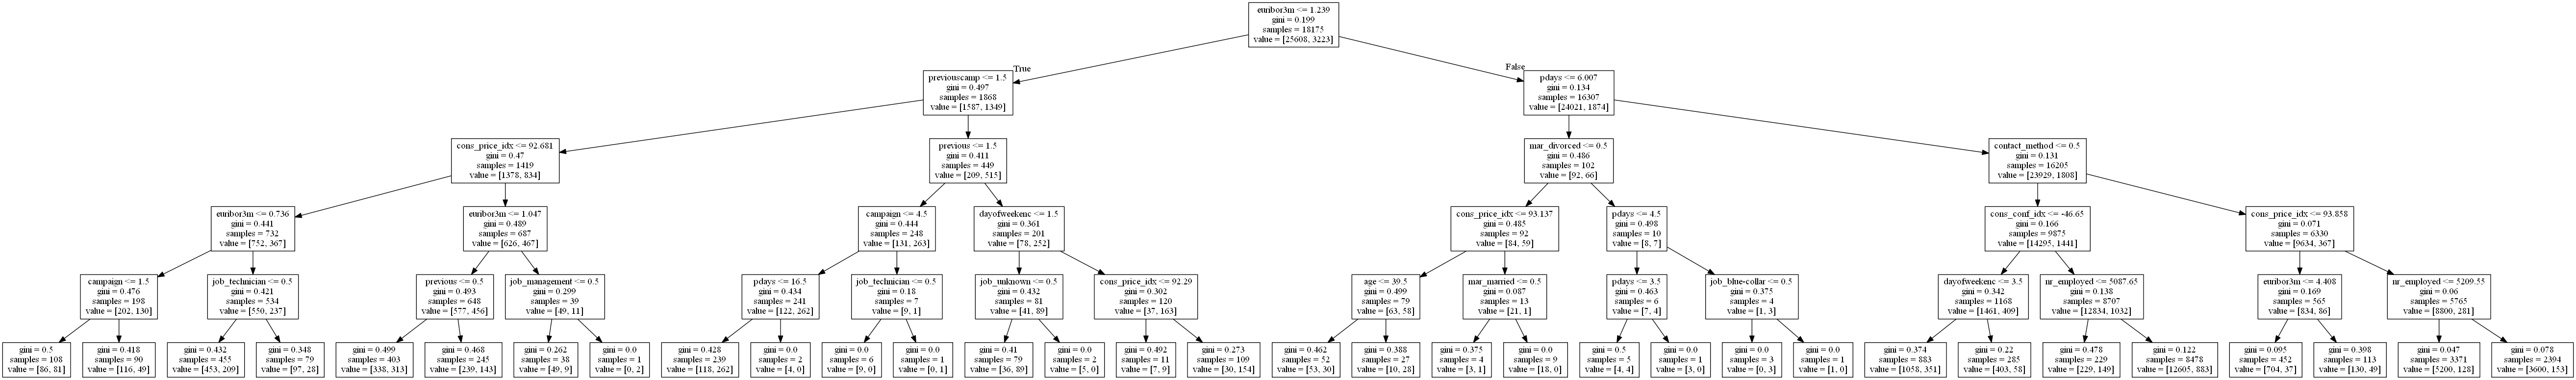

In [49]:
pdayscounts = pd.DataFrame(df.pdays.value_counts())

#calculate average number of days passed between previous campaign contact
pdaysaverage = df[df.pdays < 999].mean()
print('%.3f' % pdaysaverage.pdays)

#social_economic = df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
#print(social_economic['nr.employed'].value_counts())

data2['pdays'] = data2['pdays'].replace(999, 6.015)

#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data2, target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 5,
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)

feature_importance = pd.Series(clf.feature_importances_, 
                               index = data2.columns).sort_values(ascending=False)
feature_importance


from sklearn.tree import export_graphviz

#export as dot file
estimator = clf.estimators_[50]
export_graphviz(estimator, out_file = 'tree.dot',
                feature_names = data2.columns,
                rounded = False)


!dot -Tpng tree.dot -o tree.png

from IPython.display import Image
Image(filename = 'tree.png')


In [50]:
data1['pdays'] = data1['pdays'].replace(999, 6.015)
data1.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,mar_unknown,housingenc,defaultenc,loanenc,educationenc,monthenc,dayofweekenc,contact_method,previouscamp,yes
y,,,,,,,,,,,,,,,,,,,,,
no,39.911185,220.844807,2.633085,6.017675,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,...,0.001861,1.429928,1.553710,1.799414,4.922403,5.580853,1.974527,0.390090,0.125999,0.0
yes,40.913147,553.191164,2.051724,5.993770,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,...,0.002586,1.413578,1.809052,1.806681,5.114440,5.820905,2.019397,0.169612,0.515733,1.0


In [37]:
treesoutput = open('regoutput', 'w')

[[10851   117]
 [ 1124   265]]

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.19      0.30      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



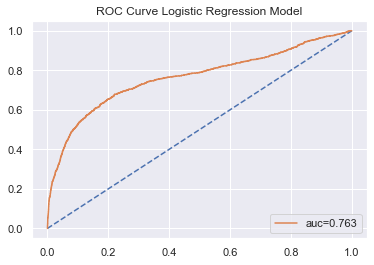

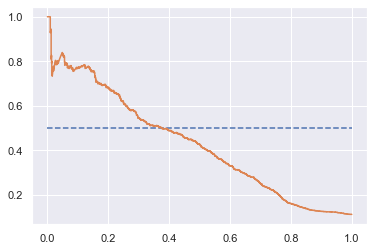

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver = 'liblinear', max_iter=4000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print()

print(metrics.classification_report(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, label = 'auc=%.3f'% auc)
plt.title(label='ROC Curve Logistic Regression Model')
plt.legend(loc = 4)
plt.savefig('logregROC.png')
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
ap = metrics.average_precision_score(y_test, y_pred_proba)

plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall, precision)
plt.show()


In [36]:
cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'defaultenc', 'monthenc',
       'dayofweekenc', 'contact_method', 'previouscamp','educationenc']

newdata = data2[cols]


logit_model = sm.Logit(target_var, newdata)
result = logit_model.fit()
print(result.summary2(), file = f)

Optimization terminated successfully.
         Current function value: 0.282452
         Iterations 7


In [29]:
f = open('logregfile', 'w')
print(f)

<_io.TextIOWrapper name='logregfile' mode='w' encoding='cp1252'>


In [33]:
import statsmodels.api as sm

logit_model = sm.Logit(target_var, data2)
result = logit_model.fit()
print(result.summary2(), file = f)

Optimization terminated successfully.
         Current function value: 0.281163
         Iterations 8


[[10862   106]
 [ 1191   198]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10968
           1       0.65      0.14      0.23      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.57      0.59     12357
weighted avg       0.87      0.90      0.86     12357



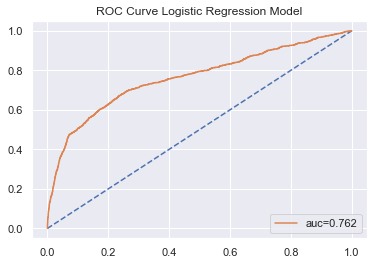

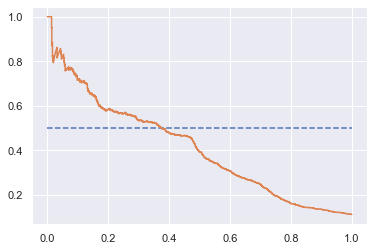

In [55]:
logreg = LogisticRegression(random_state=0, solver = 'liblinear', max_iter=4000)
logreg.fit(X_train[cols], y_train)
y_pred = logreg.predict(X_test[cols])
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print(metrics.classification_report(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test[cols])[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, label = 'auc=%.3f'% auc)
plt.title(label='ROC Curve Logistic Regression Model')
plt.legend(loc = 4)
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
ap = metrics.average_precision_score(y_test, y_pred_proba)

plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall, precision)
plt.show()